<a href="https://www.kaggle.com/code/sc0v1n0/deap-learning-knapsack-low-dimensional-0-1?scriptVersionId=194822949" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

-----

# Setting Environment

In [1]:
%pip install deap -q

Note: you may need to restart the kernel to use updated packages.


-------------

# Load Data

**Resources**:

- [Instances of 0/1 Knapsack Problem](http://artemisa.unicauca.edu.co/~johnyortega/instances_01_KP/)
- [David Pisinger's optimization codes - Generator dataset](http://hjemmesider.diku.dk/~pisinger/codes.html)

In [2]:
import os

os.listdir('/kaggle/input')

['low_dimensional']

In [3]:
import pandas as pd

ds = pd.read_csv('/kaggle/input/low_dimensional/f2_l_d_kp_20_878.csv')
ds

,value,weight
0,20,878
1,44,92
2,46,4
3,90,43
4,72,83
5,91,84
6,40,68
7,75,92
8,35,82
9,8,6


In [4]:
ds.shape

(21, 2)

------

# Development

In [5]:
capacity: int = 878
optimzal_solution: int = 1024

In [6]:
import random
import numpy
from deap import base
from deap import creator
from deap import algorithms
from deap import tools

In [7]:
def fitness_function(solution):
    fitness: int = 0
    sum_capacity: int = 0
    for i in range(len(solution)):
        if solution[i] == 1:
            fitness += ds['value'][i]
            sum_capacity += ds['weight'][i]
    if sum_capacity > capacity:
        fitness: int = 0
    return (fitness, )

-----

# First Test

In [8]:
toolbox = base.Toolbox()

creator.create("Maximization", base.Fitness, weights=(1.0,))
creator.create("Cromossomo", list, fitness=creator.Maximization)

toolbox.register("atributo", random.randint,0,1)
toolbox.register("solucaoFinal", tools.initRepeat, creator.Cromossomo, toolbox.atributo, n=len(ds['value']))
toolbox.register("Populacao", tools.initRepeat, list, toolbox.solucaoFinal)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [9]:
pop = toolbox.Populacao(n=100)
prob_cx= 0.8
prob_mt= 0.1
nger = 500
hof = tools.HallOfFame(10)

st = tools.Statistics(key=lambda ind: ind.fitness.values)
st.register("Max", numpy.max)
st.register("Avg", numpy.mean)

In [10]:
finalPop, log = algorithms.eaSimple(pop, toolbox, prob_cx, prob_mt, nger, st, hof, verbose=True)

gen	nevals	Max	Avg  
0  	100   	838	238.3
1  	83    	882	477.15
2  	77    	932	650.98
3  	77    	932	706.75
4  	79    	943	763.25
5  	86    	991	796.96
6  	82    	991	815.76
7  	79    	995	835.76
8  	76    	995	927.11
9  	76    	995	864.28
10 	88    	995	919.32
11 	89    	995	936.54
12 	78    	995	845   
13 	89    	995	938.33
14 	89    	995	939.66
15 	77    	995	987.98
16 	92    	995	972.51
17 	80    	995	970.19
18 	86    	995	980.46
19 	85    	995	988.12
20 	86    	995	978.1 
21 	90    	995	972.3 
22 	77    	995	983.74
23 	81    	995	959.96
24 	83    	995	989.23
25 	79    	995	983.29
26 	79    	995	977.74
27 	75    	995	977.89
28 	85    	995	970.16
29 	92    	995	978.44
30 	82    	995	951.98
31 	78    	995	971.05
32 	85    	995	967.39
33 	80    	995	980.03
34 	84    	995	982.42
35 	83    	995	972.86
36 	84    	995	990.49
37 	84    	995	969.93
38 	83    	995	993.32
39 	92    	995	971.85
40 	80    	995	982.51
41 	87    	995	955.03
42 	92    	995	973.27
43 	83    	995	991.86
44 	80    	9

In [11]:
best_solution = tools.selBest(finalPop, 5)
for ind in best_solution:
  print(f'{ind} - {ind.fitness.values}')

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)


In [12]:
for best in hof:
  print(f'{best} - {best.fitness.values}')

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1018.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1016.0,)
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1013.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1010.0,)
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1009.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] - (1004.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (999.0,)
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1] - (997.0,)
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] - (995.0,)


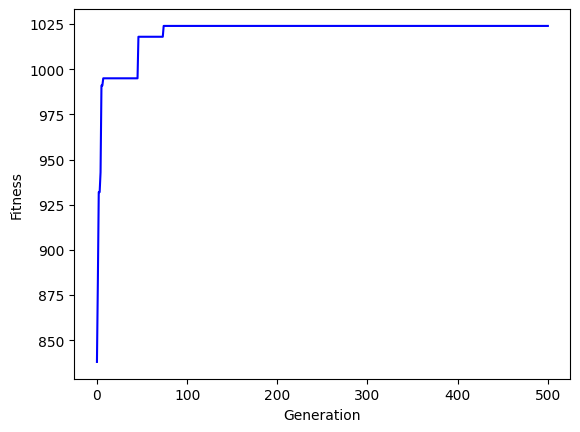

In [13]:
import matplotlib.pyplot as plt

maxFit, meanFit = log.select("Max", "Avg")

plt.plot(maxFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

-----

# Second Test

In [14]:
import pandas as pd

ds = pd.read_csv('/kaggle/input/low_dimensional/f10_l_d_kp_20_879.csv')
ds

,value,weight
0,20,879
1,91,84
2,72,83
3,90,43
4,46,4
5,55,44
6,8,6
7,35,82
8,75,92
9,61,25


In [15]:
toolbox = base.Toolbox()

creator.create("Maximization", base.Fitness, weights=(1.0,))
creator.create("Cromossomo", list, fitness=creator.Maximization)

toolbox.register("atributo", random.randint,0,1)
toolbox.register("solucaoFinal", tools.initRepeat, creator.Cromossomo, toolbox.atributo, n=len(ds['value']))
toolbox.register("Populacao", tools.initRepeat, list, toolbox.solucaoFinal)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

/opt/conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximization' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Cromossomo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [16]:
pop = toolbox.Populacao(n=100)
prob_cx= 0.8
prob_mt= 0.1
nger = 500
hof = tools.HallOfFame(10)

st = tools.Statistics(key=lambda ind: ind.fitness.values)
st.register("Max", numpy.max)
st.register("Avg", numpy.mean)

In [17]:
finalPop, log = algorithms.eaSimple(pop, toolbox, prob_cx, prob_mt, nger, st, hof, verbose=True)

gen	nevals	Max	Avg   
0  	100   	735	261.49
1  	79    	795	466.21
2  	87    	866	599.94
3  	71    	919	697.23
4  	88    	957	742.29
5  	86    	957	765.23
6  	89    	971	802.87
7  	78    	1002	874.31
8  	81    	1025	860.18
9  	79    	1025	879.09
10 	84    	1025	896.13
11 	80    	1025	895   
12 	81    	1025	896.54
13 	78    	1025	1005.93
14 	72    	1025	1009.69
15 	83    	1025	1023.91
16 	77    	1025	1020.89
17 	85    	1025	1005.04
18 	81    	1025	1010.05
19 	86    	1025	1000.9 
20 	82    	1025	1023.05
21 	88    	1025	1012.61
22 	79    	1025	1001.11
23 	85    	1025	1011.24
24 	85    	1025	987.36 
25 	79    	1025	1009.27
26 	78    	1025	1007.85
27 	70    	1025	1019.95
28 	82    	1025	979.69 
29 	81    	1025	1010.03
30 	74    	1025	1010.61
31 	83    	1025	999.96 
32 	77    	1025	1001.4 
33 	75    	1025	1012.57
34 	82    	1025	1009.82
35 	80    	1025	999.13 
36 	84    	1025	982.54 
37 	79    	1025	989.68 
38 	85    	1025	999.13 
39 	85    	1025	997.24 
40 	76    	1025	1021.99
41 	87    	102

In [18]:
best_solution = tools.selBest(finalPop, 5)
for ind in best_solution:
  print(f'{ind} - {ind.fitness.values}')

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)


In [19]:
for best in hof:
  print(f'{best} - {best.fitness.values}')

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] - (1019.0,)
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1017.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1] - (1014.0,)
[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] - (1011.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0] - (1010.0,)
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1] - (1006.0,)
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1005.0,)
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0] - (1002.0,)
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] - (999.0,)


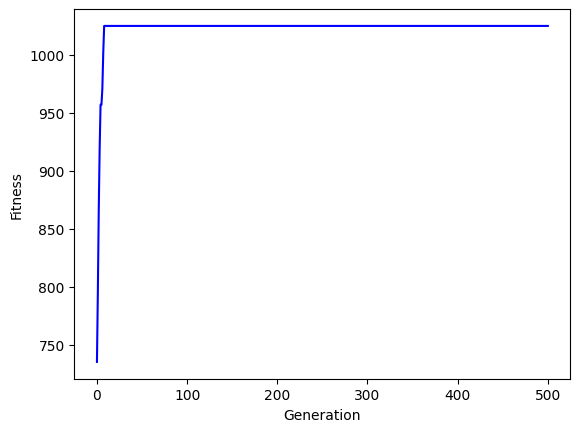

In [20]:
import matplotlib.pyplot as plt

maxFit, meanFit = log.select("Max", "Avg")

plt.plot(maxFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()